<a href="https://colab.research.google.com/github/alexeyk500/UAI/blob/master/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_1_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [1]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense #Полносвязные слой
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [2]:
#Загрузка данных Mnist
#x_train_org - входные картинки, обучающая выбрка
#y_train_org - выходные индексы, обучающая выборка
#x_test_org - входные картинки, тестовая выбрка
#y_test_org - выходные индексы, тестовая выборка
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


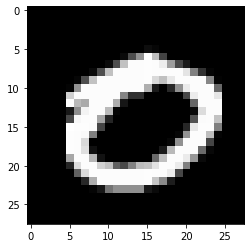

In [7]:
n = 114 #Номер картинки

#Отрисовка картинки
#Image.fromarray - создание картинки по массиву
#.convert('RGBA') - преобразование в RGBA формат
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
#Меняем формат входных картинок с 28х28 на 784х1
#Это нужно для удобства работы с полносвязным слоем (Dense)
#С двумерной картинкой мы будем работать в будущем с помощью свёрточных сетей
#Функция .reshape меняет размер массива
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [4]:
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


**Нормализация данных**

In [0]:
#Нормализуем входные картинки
#НС лучше работают, если данные нормаваны от 0 до 1
#Сейчас значения во входных картинках от 0 до 255
#Надо разделить картинки на 255
#И сначала преобразовать картинки в тип float (цифры с плавающей точкой)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [8]:
#Выводим пример индекса в выходных данных
print(y_train_org[n])

0


**Преобразуем метки в формат one hot encoding**

In [0]:
#НС сложно работать с чистыми индексами от 0 до 9
#Ей проще работать с данными в формате one hot encoding
#Это формат из 10 цифр - все 0 и одна 1 там, где правильный ответ
#Например
#Индекс 0 - это [1 0 0 0 0 0 0 0 0 0]
#Индекс 2 - это [0 0 1 0 0 0 0 0 0 0]
#Индекс 9 - это [0 0 0 0 0 0 0 0 0 1]
#Это делается функцией utils.to_categorical()
#Второй параметр - это количество классов, у нас - 10
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [10]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [11]:
#Выводим пример одного выходного вектора
print(y_train[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
#Создаём сеть прямого распространения
#Пока она пустая
#Подробнее на https://keras.io/models/sequential/
model = Sequential()

**Добавляем уровни сети**


In [13]:
#Добавляем в сеть полносвязные слои
#Dense - полносвязный слой, подробнее на https://keras.io/layers/core/
#Первый парамерт - количество нейронок, обычно от 2 до 2000, подбирается в ходе исследования
#input_dim - размер входного вектора, указывается только в первом слое сети
#activation - активационная функция нейронов данного слоя
#relu - одна из активационных функций, подробнее на https://keras.io/activations/
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))

#Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
#activation="softmax" - активационная функция, 
#которая делает сумму всех значений нейронов слой, равной 1
#Подробнее https://keras.io/activations/
model.add(Dense(10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**Компилируем сеть**

In [14]:
#Нейронку надо "скомпилировать"
#При компиляции мы задаём несколько параметров
#loss - функция ошибки, которую оптимизирует сеть
#categorical_crossentropy - одна из функций ошибки, подходящая для классификации нескольких классов, подробнее https://keras.io/activations/
#optimizer - алгоритм обучения НС
#adam - один из алгоритмов обучения НС, подробнее https://keras.io/optimizers/
#metrics - метрика качества обучения, измеряется после каждой эпохи обучения
#accuracy - метрика, процент правильно распознанных примеров, подробнее https://keras.io/metrics/
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Вывод структуры нейронки
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [15]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка, перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выбрки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
#validation_split - процент данных, на которых сеть не обучается, на которых мы измеряем точность распознавания
model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 63us/sample - loss: 0.2308 - acc: 0.9301 - val_loss: 0.1120 - val_acc: 0.9647
Epoch 2/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0823 - acc: 0.9752 - val_loss: 0.0913 - val_acc: 0.9718
Epoch 3/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0521 - acc: 0.9832 - val_loss: 0.0826 - val_acc: 0.9762
Epoch 4/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0363 - acc: 0.9885 - val_loss: 0.1131 - val_acc: 0.9662
Epoch 5/30
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0285 - acc: 0.9906 - val_loss: 0.0768 - val_acc: 0.9784
Epoch 6/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0167 - acc: 0.9947 - val_loss: 0.1070 - val_acc: 0.9726
Epoch 7/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0178 - acc: 0.9939 - val_loss: 0.

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [0]:
#Сохраняем нейронку в файл
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [0]:
#Выводим на экран список текущих файлов
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [0]:
#Скачиваем файл локально на компьютер
files.download("mnist_dense.h5")

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [0]:
#Номер тестовой цифры, которую будем распознавать
n_rec = 2021

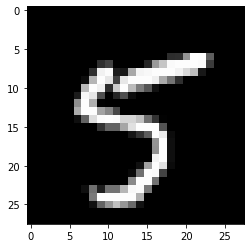

In [0]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [0]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массов примеров для распознавания
#Мы делаем массив из одного примеры
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [0]:
#Распознаём ннаш пример
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [0]:
#Выводим результат, это 10 цифр
#Сумма значений равна 1, так как финальный слой с активационной функций softmax
print(prediction)

[[8.3124561e-24 2.3543231e-25 2.5590094e-24 1.0663971e-14 5.4692244e-26
  1.0000000e+00 6.4199449e-22 1.3458565e-24 8.2802129e-15 1.5549487e-11]]


**Преобразуем результаты из формата one hot encoding**

In [0]:
#Получаем индекс самого большого элемента
#Это итоговая цифра, которую распознала сеть
prediction = np.argmax(prediction)
print(prediction)

5


**Печатаем правильный ответ**

In [0]:
#выводим правильный ответ, для сравнения
print(y_test_org[n_rec])

5


## Загружаем свою картинку

In [0]:
#Загружаем файл со своей рукописной цифрой
files.upload()

Saving Digit_2.png to Digit_2.png


{'Digit_2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x9c\x00\x00\x01\x9c\x08\x06\x00\x00\x00\xedA\x169\x00\x00\x0cLiCCPICC Profile\x00\x00H\x89\x95W\x07\\\x93G\x1b\xbfwd\x92\xb0\x02\x11\x90\x11\xf6\x12E\x10\x08 #\x84\x15A@\xa6 *!\t$\x8c\x18\x13\x82\x8a\x1b)U\xb0\x0eTDA\xadhUD\xd1:\x00\xa9\x13\xf7(\x8a\xdb:\x8a\x03\x95J-Vq\xa1\xf2]\x06h\xf5\x1b\xbf\xef\xc9\xef\xde\xf7\x9f\xe7\x9e\xfb?#w\x97;\x00\xf4j\xf82Y\x1e\xaa\x0f@\xbe\xb4@\x1e\x1f\x11\xc2\x1a\x9f\x9a\xc6"=\x02(\xfc\xe8\x02g`\xc4\x17(d\x9c\xb8\xb8h\x00e\xe0\xfdOy}\x1d \xaa\xf7\x157\x15\xd7\xb7\xfd\xffU\x0c\x84"\x85\x00\x00$\x0e\xe2L\xa1B\x90\x0f\xf1>\x00\xf0b\x81L^\x00\x00\x91\r\xf5\xb6\xd3\nd*\x9c\x0e\xb1\x91\x1c\x06\x08\xb1L\x85\xb35\xb8D\x8535\xb8Jm\x93\x18\xcf\x85x\x07\x00d\x1a\x9f/\xcf\x06@\xb7\x19\xeaY\x85\x82l\xc8\xa3{\x13bw\xa9P"\x05@\x8f\x0cq\xa0@\xcc\x17B\x1c\t\xf1\xb0\xfc\xfc)*\x0c\xed\x80S\xe6\x17<\xd9\xff\xe0\xcc\x1c\xe4\xe4\xf3\xb3\x07\xb1&\x17\xb5\x90C%\nY\x1e\x7f\xc6\xffY\x8e\xff-\xf9y\xca\x01\x1f\x0e\xb

Проверяем загрузку картинки

In [0]:
!ls

Digit_2.png  mnist_dense.h5  sample_data


Загружаем картинку из файла

In [0]:
#Указывает путь к файлу
img_path = 'Digit_2.png'
#Загружаем картинку, меняем размер на 28х28, формат на оттенки серого
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

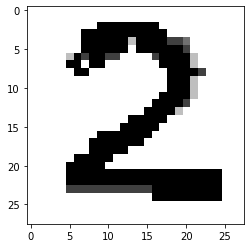

In [0]:
#Выводим картинку
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [0]:
#Преобразуем картинку в массив
x = image.img_to_array(img)
#Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
#Инвертируем изображение, нам надо белое на чёрном фоне
x = 255 - x
#Нормализуем изображение
x /= 255

Запускаем распознавание

In [0]:
#Распознаём картинку
prediction = model.predict(x)

Результаты распознавания

In [0]:
#Выводим результат
prediction

array([[0.0000000e+00, 4.8511620e-33, 1.0000000e+00, 1.5919799e-20,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.9951747e-35,
        3.3649753e-38, 0.0000000e+00]], dtype=float32)

In [0]:
#Выводим распознанную цифру
print(np.argmax(prediction))

2


#Функция быстрого теста сети

In [0]:
#Функция генерации нейронки
#neoronsL1 - нейронов в первом слое
#neuronsL2 - нейронов в втором слое, 0 - если не делать слой
#neuronsL3 - нейронов в третьем слое, 0 - если не делать слой
#innerActivation - активационная функция скрытых слоёв
#outputActivation - активационная функция выходного слоя
def createNet(neoronsL1, neuronsL2, neuronsL3, innerActivation, outputActivation):
  model = Sequential() #Создаём сеть
  model.add(Dense(neoronsL1, input_dim=784, activation=innerActivation)) #Добавляем первый слой
  
  #Если число второго слоя > 0
  #Создаём второй слой
  if (neuronsL2 > 0):
    model.add(Dense(neuronsL2, activation=innerActivation))
  
  #Если число третьего слоя > 0
  #Создаём третий слой
  if (neuronsL3 > 0):
    model.add(Dense(neuronsL3, activation=innerActivation))
    
  #Создаём выходной слой
  model.add(Dense(10, activation=outputActivation))
  
  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  #Возвращаем созданную сеть
  return model

#Обучаем и тестируем сеть
#Net - лист с 5 параметрами сети
#batch_size - размер батча
#epochs - число эпох обучения
#iterations - число запусков сети
def testModel(net, batch_size, epochs, iterations):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = createNet(net[0], net[1], net[2], net[3], net[4])
    #Обучаем сеть
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2)
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_acc"][-1])
  
  #Возвращаем лист точностей
  return model, acc

In [46]:
#Запускаем тест одной нейронки 100 раз
model, acc = testModel([800,0,0,'relu','softmax'], 200, 10, 3)
print(acc)

[0.97625, 0.97866666, 0.9798333]


In [51]:
get_test_accuracy(model)

0.9802

In [47]:
#Отображаем результаты
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))

Точность на всех запусках:  [0.9762, 0.9787, 0.9798]
Среднее значение точности:  0.9782
Амплитуда разброса точности:  0.0036
Среднеквадратичное отклонение точности:  0.001492


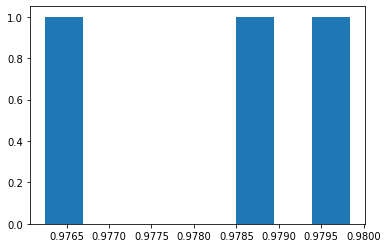

In [48]:
#Строим гистограмму точности сети
plt.hist(acc, 8)
plt.show()

**Генерируем и тестируем нейронки**

In [0]:
#Создаём 5 различных сетей
net = []
net.append([800, 0, 0, 'relu', 'softmax'])
net.append([400, 0, 0, 'relu', 'softmax'])
net.append([400, 400, 0, 'relu', 'softmax'])
net.append([800, 0, 0, 'linear', 'softmax'])
net.append([800, 0, 0, 'relu', 'sigmoid'])

In [0]:
#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  acc = testModel(net = currNet, batch_size = 200, epochs = 10, iterations = 3)
  print(currNet, round(sum(acc)/len(acc),4))

[800, 0, 0, 'relu', 'softmax'] 0.9799
[400, 0, 0, 'relu', 'softmax'] 0.9775
[400, 400, 0, 'relu', 'softmax'] 0.9763
[800, 0, 0, 'linear', 'softmax'] 0.922
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[800, 0, 0, 'relu', 'sigmoid'] 0.0995


In [0]:
def get_test_accuracy(model_in):  
  list_result = []
  for i in range(x_test.shape[0]):
    #Выбираем нужную картинку из тестовой выборки
    x = x_test[i]
    #Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
    #Потому что нейронка принимает именно массов примеров для распознавания
    #Мы делаем массив из одного примеры
    x = np.expand_dims(x, axis=0)
    #Распознаём наш пример
    prediction = model_in.predict(x)
    #Проверяем результат предсказания по тествой выборке
    result = np.argmax(y_test[i]) == np.argmax(prediction)
    #Заносим результат проверки в список
    list_result.append(result)
    #Считаем точность на тестовой выборке
    test_accuracy = round(sum(list_result)/len(list_result),4)
  #print(test_accuracy)
  return test_accuracy

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
list_test_net = []

In [0]:
#Создаём 10 различных сетей с одним внутренним слоем
net = []
net.append([25, 0, 0, 'relu', 'softmax'])
net.append([50, 0, 0, 'relu', 'softmax'])
net.append([100, 0, 0, 'relu', 'softmax'])
net.append([200, 0, 0, 'relu', 'softmax'])
net.append([400, 0, 0, 'relu', 'softmax'])
net.append([800, 0, 0, 'relu', 'softmax'])
net.append([1600, 0, 0, 'relu', 'softmax'])
net.append([3200, 0, 0, 'relu', 'softmax'])
net.append([6400, 0, 0, 'relu', 'softmax'])
net.append([12800, 0, 0, 'relu', 'softmax'])

In [62]:
#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  model, acc = testModel(net = currNet, batch_size = 200, epochs = 10, iterations = 3)
  test_accuracy = get_test_accuracy(model)
  list_test_net.append([currNet, 'train_acc = ', round(sum(acc)/len(acc),4), 'test_acc = ',test_accuracy])
  print(list_test_net[-1])

[[25, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9513, 'test_acc = ', 0.9509]
[[50, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9634, 'test_acc = ', 0.961]
[[100, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9707, 'test_acc = ', 0.9719]
[[200, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9761, 'test_acc = ', 0.978]
[[400, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9767, 'test_acc = ', 0.9788]
[[800, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9792, 'test_acc = ', 0.9804]
[[1600, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9801, 'test_acc = ', 0.9803]
[[3200, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9803, 'test_acc = ', 0.9804]
[[6400, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9794, 'test_acc = ', 0.9826]
[[12800, 0, 0, 'relu', 'softmax'], 'train_acc = ', 0.9771, 'test_acc = ', 0.9768]


In [0]:
#Создаём 10 различных сетей с двумя внутренним слоями
net = []
net.append([25, 25, 0, 'relu', 'softmax'])
net.append([50, 50, 0, 'relu', 'softmax'])
net.append([100, 100, 0, 'relu', 'softmax'])
net.append([200, 200, 0, 'relu', 'softmax'])
net.append([400, 400, 0, 'relu', 'softmax'])
net.append([800, 800, 0, 'relu', 'softmax'])
net.append([1600, 1600, 0, 'relu', 'softmax'])
net.append([3200, 3200, 0, 'relu', 'softmax'])
net.append([6400, 6400, 0, 'relu', 'softmax'])
net.append([12800, 12800, 0, 'relu', 'softmax'])

In [64]:
#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  model, acc = testModel(net = currNet, batch_size = 200, epochs = 10, iterations = 3)
  test_accuracy = get_test_accuracy(model)
  list_test_net.append([currNet, 'train_acc = ', round(sum(acc)/len(acc),4), 'test_acc = ',test_accuracy])
  print(list_test_net[-1])

[[25, 25, 0, 'relu', 'softmax'], 'train_acc = ', 0.9564, 'test_acc = ', 0.9584]
[[50, 50, 0, 'relu', 'softmax'], 'train_acc = ', 0.9665, 'test_acc = ', 0.9651]
[[100, 100, 0, 'relu', 'softmax'], 'train_acc = ', 0.9731, 'test_acc = ', 0.9764]
[[200, 200, 0, 'relu', 'softmax'], 'train_acc = ', 0.9747, 'test_acc = ', 0.9787]
[[400, 400, 0, 'relu', 'softmax'], 'train_acc = ', 0.9767, 'test_acc = ', 0.9803]
[[800, 800, 0, 'relu', 'softmax'], 'train_acc = ', 0.9778, 'test_acc = ', 0.98]
[[1600, 1600, 0, 'relu', 'softmax'], 'train_acc = ', 0.9766, 'test_acc = ', 0.9757]
[[3200, 3200, 0, 'relu', 'softmax'], 'train_acc = ', 0.9746, 'test_acc = ', 0.9771]
[[6400, 6400, 0, 'relu', 'softmax'], 'train_acc = ', 0.9771, 'test_acc = ', 0.9759]
[[12800, 12800, 0, 'relu', 'softmax'], 'train_acc = ', 0.9781, 'test_acc = ', 0.9793]


In [0]:
#Создаём 10 различных сетей с тремя внутренним слоями
net = []
net.append([25, 25, 25, 'relu', 'softmax'])
net.append([50, 50, 25, 'relu', 'softmax'])
net.append([100, 100, 100, 'relu', 'softmax'])
net.append([200, 200, 200, 'relu', 'softmax'])
net.append([400, 400, 400, 'relu', 'softmax'])
net.append([800, 800, 800, 'relu', 'softmax'])
net.append([1600, 1600, 1600, 'relu', 'softmax'])
net.append([3200, 3200, 3200, 'relu', 'softmax'])
net.append([6400, 6400, 6400, 'relu', 'softmax'])
net.append([12800, 12800, 12800, 'relu', 'softmax'])

In [10]:
#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  model, acc = testModel(net = currNet, batch_size = 200, epochs = 10, iterations = 3)
  test_accuracy = get_test_accuracy(model)
  list_test_net.append([currNet, 'train_acc = ', round(sum(acc)/len(acc),4), 'test_acc = ',test_accuracy])
  print(list_test_net[-1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


NameError: ignored